In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing
from monte_carlo import estimate_pi_parallel
# Function to estimate Pi for a single batch
def estimate_batch(batch_size):
    x = np.random.random(batch_size)
    y = np.random.random(batch_size)
    inside_circle = np.sum(x**2 + y**2 <= 1)
    return inside_circle

def estimate_pi_parallel(num_points, batch_size=1000):
    """Estimate π using Monte Carlo method with parallelized batches."""
    num_batches = num_points // batch_size
    estimates = []
    inside_circle_total = 0

    print(f"Starting the parallel Monte Carlo simulation with {num_batches} batches.")
    
    with multiprocessing.Pool() as pool:
        # Split work into batches and process them in parallel
        results = pool.map(estimate_batch, [batch_size] * num_batches)
        
        for i, result in enumerate(results, 1):
            inside_circle_total += result
            pi_estimate = (inside_circle_total / (i * batch_size)) * 4
            estimates.append(pi_estimate)
            
            if i % 100 == 0:  # Print status every 100 batches
                print(f"Batch {i}/{num_batches} completed. Current estimate of π: {pi_estimate}")
    
    print("Simulation complete.")
    return estimates

if __name__ == "__main__":  # Ensure this is added for Windows compatibility
    num_samples = 10**3  # Reduce the number of samples for faster processing
    batch_size = 1000   # Process in batches of 10,000 points

    # Estimate π using the parallelized Monte Carlo method
    estimates = estimate_pi_parallel(num_samples, batch_size)

    # Plot the convergence of π estimate
    plt.figure(figsize=(10, 6))
    plt.plot(estimates, label="Estimated π", color="blue")
    plt.axhline(y=np.pi, color="red", linestyle="--", label="Actual π")
    plt.xlabel("Number of Points (in batches of 10,000)")
    plt.ylabel("Estimate of π")
    plt.title("Convergence of Monte Carlo Estimate of π")
    plt.legend()
    plt.grid(True)
    plt.show()


Starting the Monte Carlo simulation with 100 batches.
Batch 100/100 completed. Current estimate of π: 3.139156
Simulation complete.


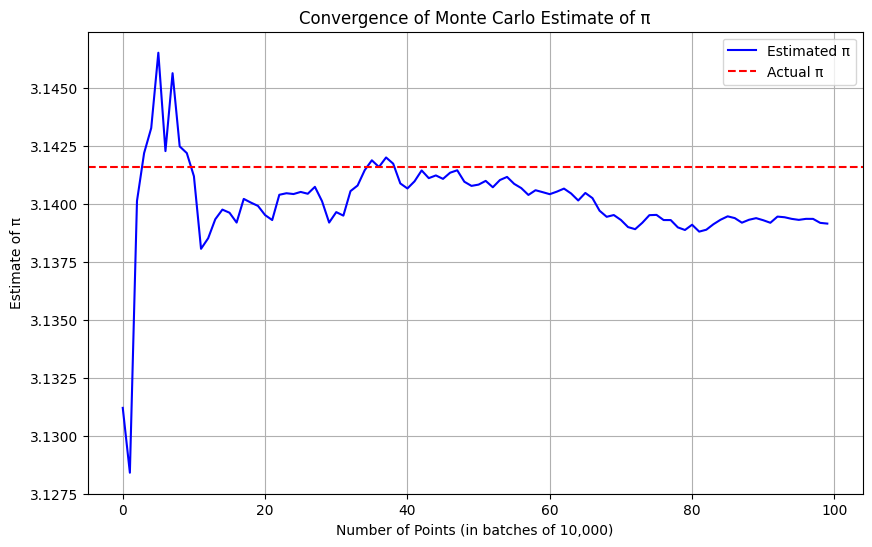

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def estimate_batch(batch_size):
    """Estimate Pi for a batch of points."""
    x = np.random.random(batch_size)
    y = np.random.random(batch_size)
    inside_circle = np.sum(x**2 + y**2 <= 1)
    return inside_circle

def estimate_pi_single_process(num_points, batch_size=10000):
    """Estimate π using Monte Carlo method in a single process."""
    num_batches = num_points // batch_size
    estimates = []
    inside_circle_total = 0

    print(f"Starting the Monte Carlo simulation with {num_batches} batches.")

    for i in range(1, num_batches + 1):
        # Estimate Pi for a single batch
        inside_circle_total += estimate_batch(batch_size)
        
        # Update the estimate of Pi based on the results so far
        pi_estimate = (inside_circle_total / (i * batch_size)) * 4
        estimates.append(pi_estimate)

        if i % 100 == 0:  # Print status every 100 batches
            print(f"Batch {i}/{num_batches} completed. Current estimate of π: {pi_estimate}")

    print("Simulation complete.")
    return estimates

if __name__ == "__main__":  # Ensure this is added for Windows compatibility
    num_samples = 10**6  # Reduced sample size to 1 million points
    batch_size = 10000   # Process in batches of 10,000 points

    # Estimate π using the single-process Monte Carlo method
    estimates = estimate_pi_single_process(num_samples, batch_size)

    # Plot the convergence of π estimate
    plt.figure(figsize=(10, 6))
    plt.plot(estimates, label="Estimated π", color="blue")
    plt.axhline(y=np.pi, color="red", linestyle="--", label="Actual π")
    plt.xlabel("Number of Points (in batches of 10,000)")
    plt.ylabel("Estimate of π")
    plt.title("Convergence of Monte Carlo Estimate of π")
    plt.legend()
    plt.grid(True)
    plt.show()


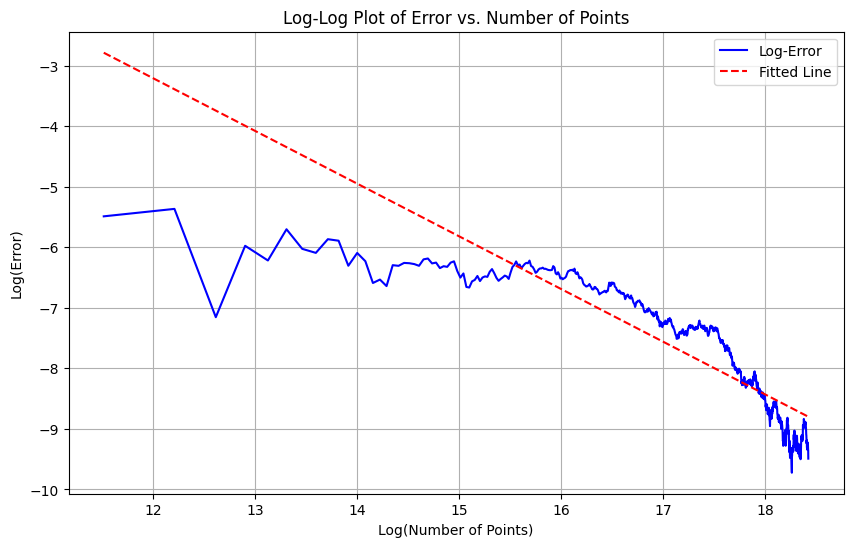

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression  # For linear regression

def estimate_batch(batch_size):
    """Estimate Pi for a batch of points."""
    x = np.random.random(batch_size)
    y = np.random.random(batch_size)
    inside_circle = np.sum(x**2 + y**2 <= 1)
    return inside_circle

def estimate_pi_single_process(num_points, batch_size=100000):
    """Estimate π using Monte Carlo method in a single process."""
    num_batches = num_points // batch_size
    estimates = []
    inside_circle_total = 0

    for i in range(1, num_batches + 1):
        # Estimate Pi for a single batch
        inside_circle_total += estimate_batch(batch_size)
        
        # Update the estimate of Pi based on the results so far
        pi_estimate = (inside_circle_total / (i * batch_size)) * 4
        estimates.append(pi_estimate)

    return estimates

def calculate_error(estimate, true_value):
    """Calculate the absolute error between the estimate and the true value of π."""
    return abs(estimate - true_value)

def plot_log_log(errors, num_samples, batch_size):
    """Plot log-log of error vs. number of points."""
    # Calculate log-log values for error and number of points
    log_errors = np.log(errors)
    log_n = np.log(np.arange(batch_size, num_samples + 1, batch_size))

    # Perform linear regression on the log-log data
    regressor = LinearRegression()
    regressor.fit(log_n.reshape(-1, 1), log_errors)

    # Predict the fitted line
    log_errors_pred = regressor.predict(log_n.reshape(-1, 1))

    # Plot the log-log graph
    plt.figure(figsize=(10, 6))
    plt.plot(log_n, log_errors, label="Log-Error", color="blue")
    plt.plot(log_n, log_errors_pred, label="Fitted Line", color="red", linestyle="--")
    plt.xlabel("Log(Number of Points)")
    plt.ylabel("Log(Error)")
    plt.title("Log-Log Plot of Error vs. Number of Points")
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":  # Ensure this is added for Windows compatibility
    num_samples = 10**8  # Use 1 million points
    batch_size = 100000  # Batch size set to 100,000 for faster processing

    # Estimate π using the single-process Monte Carlo method
    estimates = estimate_pi_single_process(num_samples, batch_size)

    # Calculate errors
    errors = [calculate_error(est, np.pi) for est in estimates]

    # Plot the log-log plot with linear regression
    plot_log_log(errors, num_samples, batch_size)


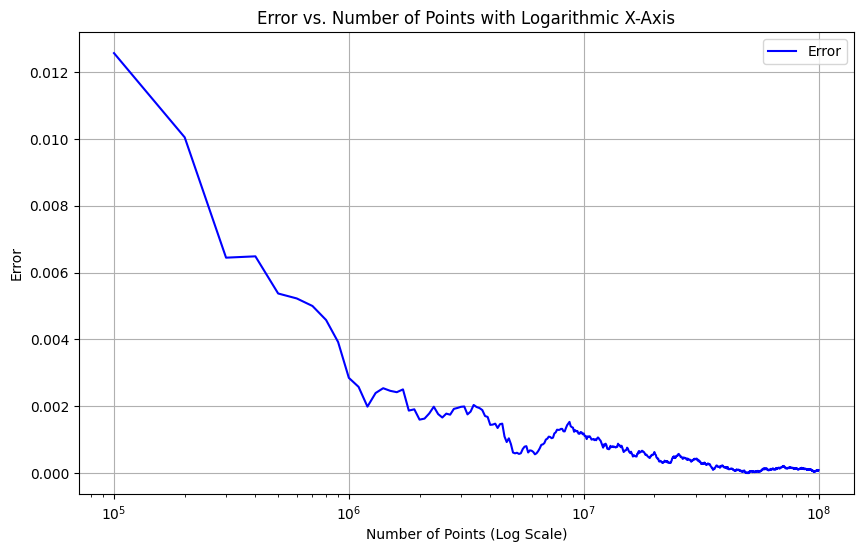

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression  # For linear regression

def estimate_batch(batch_size):
    """Estimate Pi for a batch of points."""
    x = np.random.random(batch_size)
    y = np.random.random(batch_size)
    inside_circle = np.sum(x**2 + y**2 <= 1)
    return inside_circle

def estimate_pi_single_process(num_points, batch_size=100000):
    """Estimate π using Monte Carlo method in a single process."""
    num_batches = num_points // batch_size
    estimates = []
    inside_circle_total = 0

    for i in range(1, num_batches + 1):
        # Estimate Pi for a single batch
        inside_circle_total += estimate_batch(batch_size)
        
        # Update the estimate of Pi based on the results so far
        pi_estimate = (inside_circle_total / (i * batch_size)) * 4
        estimates.append(pi_estimate)

    return estimates

def calculate_error(estimate, true_value):
    """Calculate the absolute error between the estimate and the true value of π."""
    return abs(estimate - true_value)

def plot_log_x_axis(errors, num_samples, batch_size):
    """Plot error vs. number of points with a logarithmic x-axis."""
    # Create the x values (number of points) and corresponding errors
    n_values = np.arange(batch_size, num_samples + 1, batch_size)
    
    # Plot the error vs. number of points with log scale for x-axis
    plt.figure(figsize=(10, 6))
    plt.plot(n_values, errors, label="Error", color="blue")
    plt.xscale('log')  # Set the x-axis to logarithmic scale
    plt.xlabel("Number of Points (Log Scale)")
    plt.ylabel("Error")
    plt.title("Error vs. Number of Points with Logarithmic X-Axis")
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":  # Ensure this is added for Windows compatibility
    num_samples = 10**8  # Use 10 million points
    batch_size = 100000  # Batch size set to 100,000 for faster processing

    # Estimate π using the single-process Monte Carlo method
    estimates = estimate_pi_single_process(num_samples, batch_size)

    # Calculate errors
    errors = [calculate_error(est, np.pi) for est in estimates]

    # Plot the error vs. number of points with logarithmic x-axis
    plot_log_x_axis(errors, num_samples, batch_size)


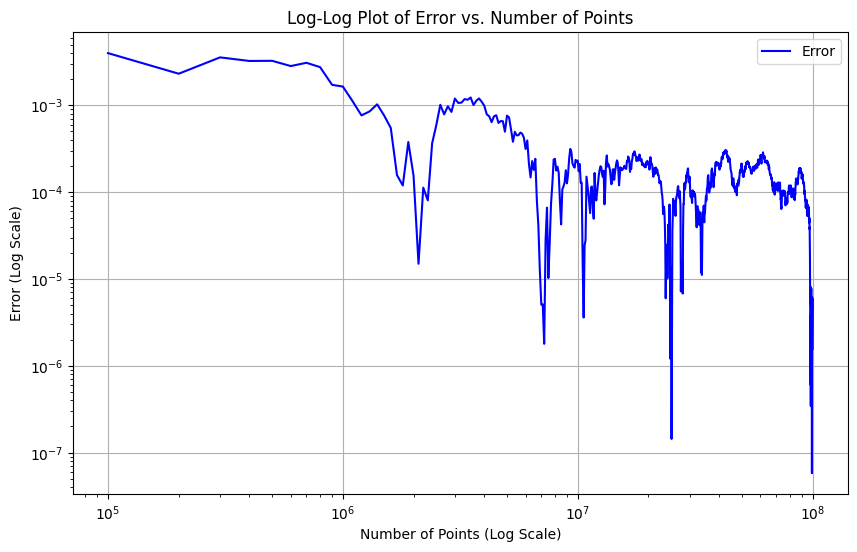

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression  # For linear regression

def estimate_batch(batch_size):
    """Estimate Pi for a batch of points."""
    x = np.random.random(batch_size)
    y = np.random.random(batch_size)
    inside_circle = np.sum(x**2 + y**2 <= 1)
    return inside_circle

def estimate_pi_single_process(num_points, batch_size=100000):
    """Estimate π using Monte Carlo method in a single process."""
    num_batches = num_points // batch_size
    estimates = []
    inside_circle_total = 0

    for i in range(1, num_batches + 1):
        # Estimate Pi for a single batch
        inside_circle_total += estimate_batch(batch_size)
        
        # Update the estimate of Pi based on the results so far
        pi_estimate = (inside_circle_total / (i * batch_size)) * 4
        estimates.append(pi_estimate)

    return estimates

def calculate_error(estimate, true_value):
    """Calculate the absolute error between the estimate and the true value of π."""
    return abs(estimate - true_value)

def plot_log_log(errors, num_samples, batch_size):
    """Plot error vs. number of points with log-log scale for both axes."""
    # Create the x values (number of points) and corresponding errors
    n_values = np.arange(batch_size, num_samples + 1, batch_size)
    
    # Plot the error vs. number of points with log-log scale for both axes
    plt.figure(figsize=(10, 6))
    plt.plot(n_values, errors, label="Error", color="blue")
    plt.xscale('log')  # Set the x-axis to logarithmic scale
    plt.yscale('log')  # Set the y-axis to logarithmic scale
    plt.xlabel("Number of Points (Log Scale)")
    plt.ylabel("Error (Log Scale)")
    plt.title("Log-Log Plot of Error vs. Number of Points")
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":  # Ensure this is added for Windows compatibility
    num_samples = 10**8  # Use 10 million points
    batch_size = 100000  # Batch size set to 100,000 for faster processing

    # Estimate π using the single-process Monte Carlo method
    estimates = estimate_pi_single_process(num_samples, batch_size)

    # Calculate errors
    errors = [calculate_error(est, np.pi) for est in estimates]

    # Plot the error vs. number of points with log-log scale
    plot_log_log(errors, num_samples, batch_size)
